## New York Airbnb EDA solution
Step 1: Data collection

In [1]:
# Libraries
import pandas as pd

# When you work locally it is likely to have an error with the SSL certification
# Recomend use request for read csv
import requests
from io import StringIO

In [3]:
# Import DB
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
response = requests.get(url, verify= False) # Unable SSL certification
data = pd.read_csv(StringIO(response.text))
data.sample(5)


/Users/rodripinedo/Documents/4GEEKS/repos/my_bootcamp/Machine Learning/machine_lerning_project/.venv/lib/python3.12/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
19130,15215887,Spacious Studio Apartment with Full Size Kitchen,96677104,Charles,Manhattan,Hell's Kitchen,40.76615,-73.98408,Private room,189,15,0,NaN,NaN,1,0
44011,33993547,Small Private Room in 3 bdr apt - East Village,33214549,Alexandre,Manhattan,East Village,40.72670,-73.98316,Private room,99,1,5,2019-06-13,1.90,5,0
40841,31729652,Sunny Studio located in the heart of Harlem,91390716,Kathiana Joy,Manhattan,Harlem,40.81207,-73.94335,Entire home/apt,80,2,3,2019-02-25,0.63,1,0
2585,1346003,1 Bedroom Railroad in Williamsburg,5605755,Amith,Brooklyn,Williamsburg,40.71652,-73.94309,Entire home/apt,150,3,52,2019-04-22,0.72,1,342
13206,9965305,Beautiful room in Brooklyn,887115,Liis,Brooklyn,Crown Heights,40.67665,-73.95734,Private room,90,1,1,2016-01-02,0.02,1,0


In [11]:
# Create DB in data/raw
data.to_csv("../data/raw/data.csv", index= False)

## Step 2: Exploration and data cleaning

In [5]:
# Obtain information about DB
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We observe that there are two columns with NaN data, being: "last_review" and "reviews_per_mount"

Types of data:

- **8 Categorical Characteristics:** (id, name, host_id, host_name, neighbourhood_group, neighbourhood, room_type, availability_365)
- **8 Numerical Characteristics:** (latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count)

## Eliminate duplicates

In [12]:
print(f"The number of duplicated Name records is: {data['name'].duplicated().sum()}")
print(f"The number of duplicated Host ID records is: {data['host_id'].duplicated().sum()}")
print(f"The number of duplicated ID records is: {data['id'].duplicated().sum()}")

The number of duplicated Name records is: 989
The number of duplicated Host ID records is: 11438
The number of duplicated ID records is: 0


- **name:** has duplicated values, is probability the people can put the same names
- **host_id:** can have duplicates, because the homeowners have more two Airbnbs registered
- **id:** 0 duplicates, because should be all unique records

## Eliminate irrelevant information

In [16]:
data_clean = data.copy()
data_clean.drop(['id', 'name', 'host_name', 'last_review', 'reviews_per_month'], axis= 1, inplace= True)
data_clean.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [17]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB


## Step 3: Analysis of univariate variables

### Analysis on categorical variables

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

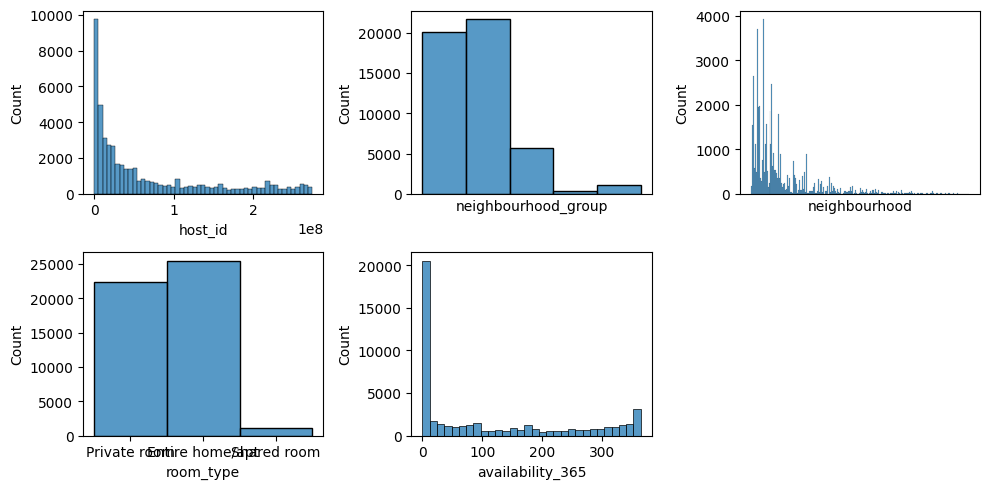

In [27]:
fig, axis = plt.subplots(2, 3, figsize= (10,5))

# Create Histogram
sns.histplot(ax = axis[0,0], data = data_clean, x = "host_id")
sns.histplot(ax = axis[0,1], data = data_clean, x = "neighbourhood_group").set_xticks([]) # Use metod .set_xticks for put labels, in this case is clean
sns.histplot(ax = axis[0,2], data = data_clean, x = "neighbourhood").set_xticks([]) # Use metod .set_xticks for put labels, in this case is clean
sns.histplot(ax = axis[1,0], data = data_clean, x = "room_type")
sns.histplot(ax = axis[1,1], data = data_clean, x = "availability_365")
fig.delaxes(axis[1, 2])

# Adjusut layout
plt.tight_layout()
# Show the plot
plt.show()

Observations:
- There is a high number of host_id with a value of 0, which may be an error or NaN data
- There are only 5 neighborhoods in our analysis
- There is a variation according to the number of Airbnbs on offer per neighborhood
- There are more complete houses/apartments for rent than private rooms, and shared rooms are the least available
- In the 365-day availability there is a possible error or NaN data

### Analysis on numeric variables

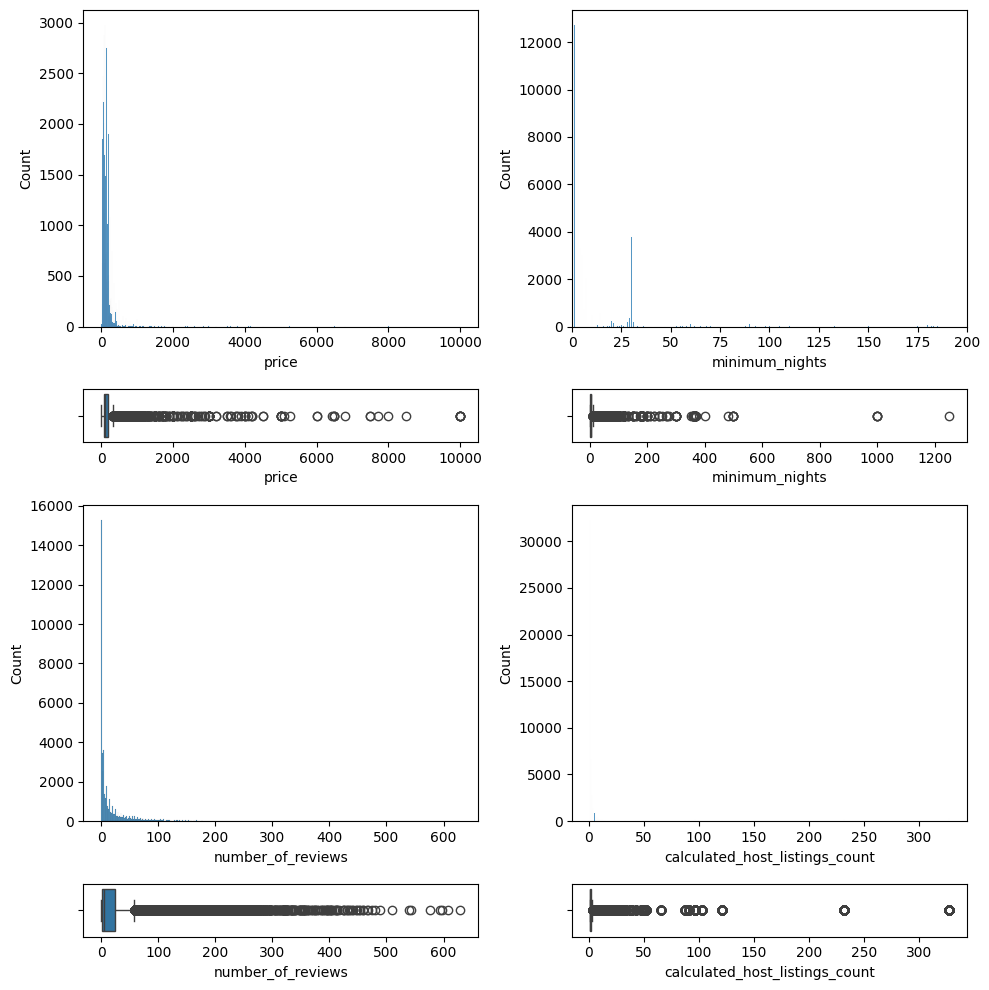

In [29]:
fig, axis = plt.subplots(4, 2, figsize = (10, 10), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = data_clean, x = "price")
sns.boxplot(ax = axis[1, 0], data = data_clean, x = "price")

sns.histplot(ax = axis[0, 1], data = data_clean, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = data_clean, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = data_clean, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = data_clean, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = data_clean, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = data_clean, x = "calculated_host_listings_count")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

There are alot outliers

## Step 4: Analysis of multivariate variables

### Numerical-numerical analysis

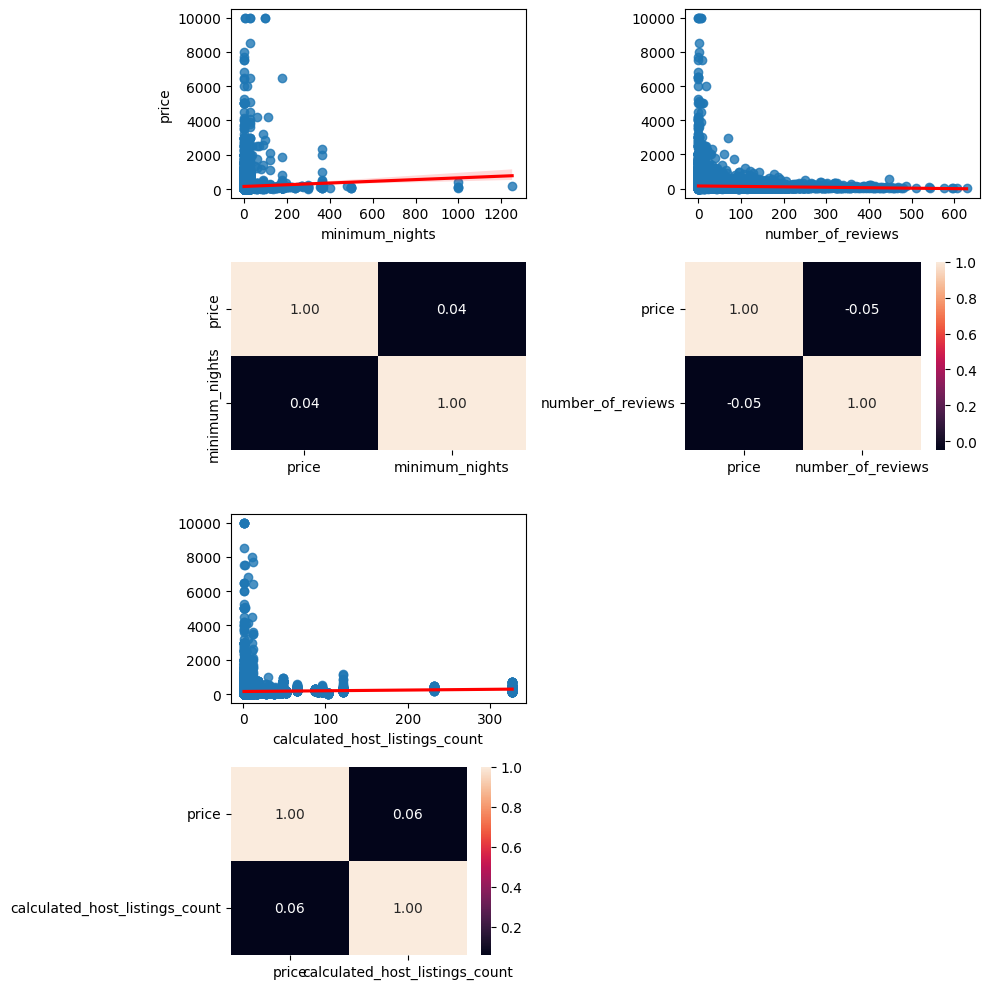

In [32]:
fig, axis = plt.subplots(4, 2, figsize = (10, 10))

# Create Plates 
sns.regplot(ax = axis[0, 0], data = data_clean, x = "minimum_nights", y = "price", line_kws={"color": "red"})
sns.heatmap(data_clean[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = data_clean, x = "number_of_reviews", y = "price", line_kws={"color": "red"}).set(ylabel = None)
sns.heatmap(data_clean[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = data_clean, x = "calculated_host_listings_count", y = "price", line_kws={"color": "red"}).set(ylabel = None)
sns.heatmap(data_clean[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

There are no relationships between any variable and the price

### Categorical-categorical analysis

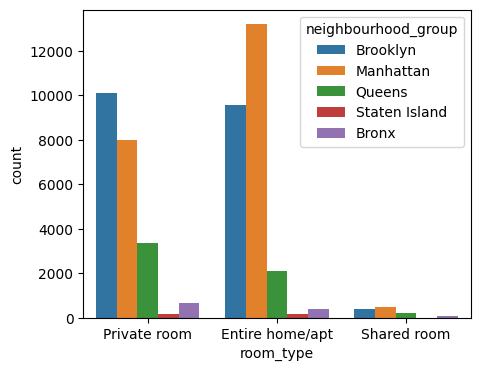

In [33]:
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = data_clean, x = "room_type", hue = "neighbourhood_group")

# Show the plot
plt.show()

Observations:
- Manhattan and Brooklyn are the neighborhoods with the highest supply of Private Rooms and Entire home/apt
- Queens is the third neighborhood with the highest supply
- The other neighborhoods are not very relevant
- No particular data behavior can be seen
- Shared rooms are almost irrelevant due to the amount of supply

### Numerical-categorical analysis (complete)

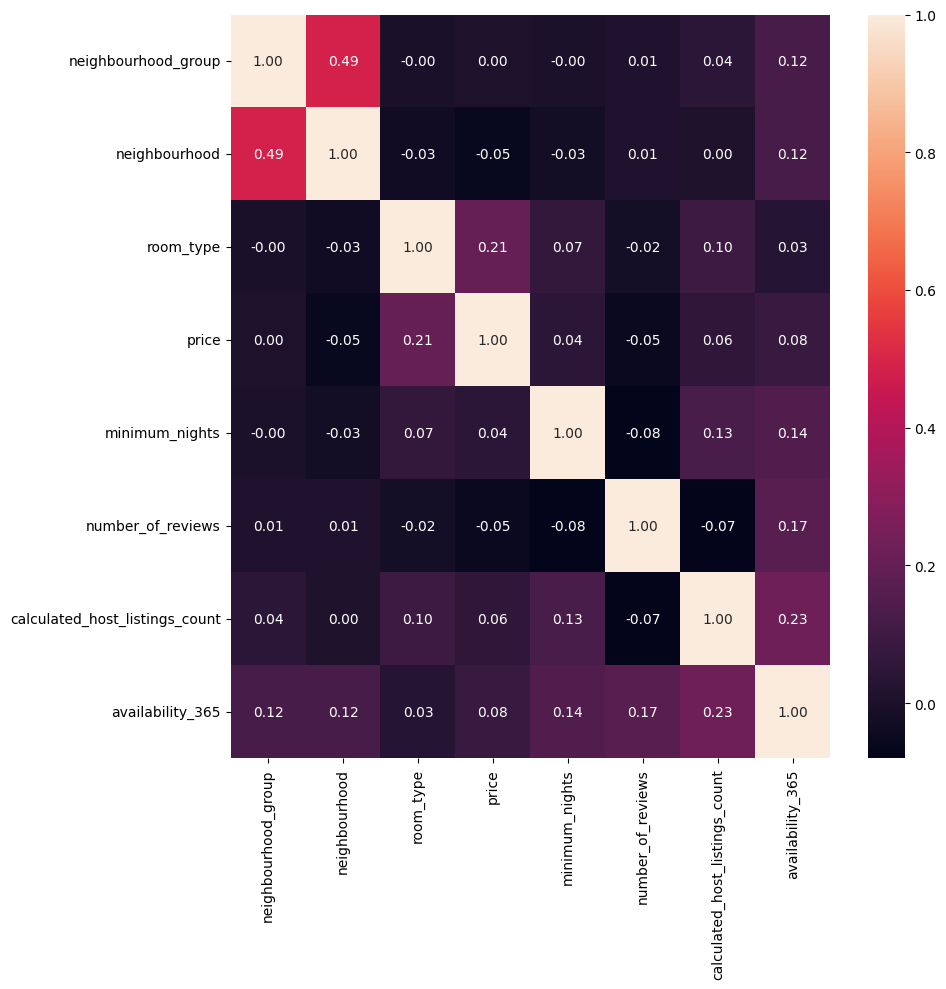

In [35]:
# Factorize the Room Type and Neighborhood Data
data_clean["room_type"] = pd.factorize(data_clean["room_type"])[0]
data_clean["neighbourhood_group"] = pd.factorize(data_clean["neighbourhood_group"])[0]
data_clean["neighbourhood"] = pd.factorize(data_clean["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(10, 10))

sns.heatmap(data_clean[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

This heat map shows us that there is no relationship between the DS variables, therefore, it is difficult to conclude any interesting or helpful data in this analysis.

## Step 5: Feature engineering

### Outliers analysis

In [39]:
data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
neighbourhood_group,48895.0,7.869107e-01,8.443860e-01,0.00000,0.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
neighbourhood,48895.0,2.988878e+01,3.467663e+01,0.00000,7.500000e+00,1.900000e+01,3.700000e+01,2.200000e+02
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
room_type,48895.0,5.671132e-01,5.412489e-01,0.00000,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02


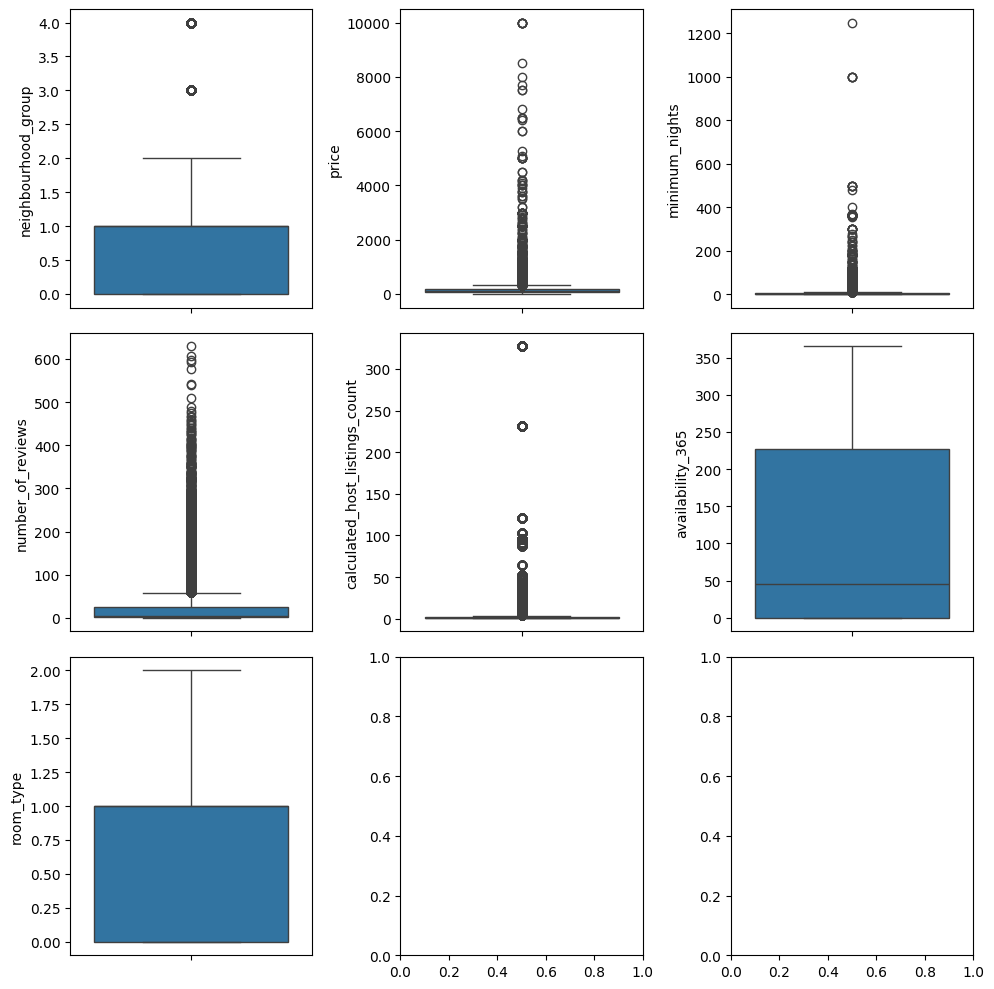

In [41]:
fig, axes = plt.subplots(3, 3, figsize = (10, 10))

sns.boxplot(ax = axes[0, 0], data = data_clean, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = data_clean, y = "price")
sns.boxplot(ax = axes[0, 2], data = data_clean, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = data_clean, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = data_clean, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = data_clean, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = data_clean, y = "room_type")

plt.tight_layout()

plt.show()

Considered outliders from:
- Price
- Calculated_host_listings_count
- Number_of_reviews
- Minimum_nights

### Start adjust with data of Price

In [43]:
# Stats for Price
price_stats = data_clean["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

The upper and lower limits for finding outliers are 334.0 and -90.0, with an interquartile range of 106.0


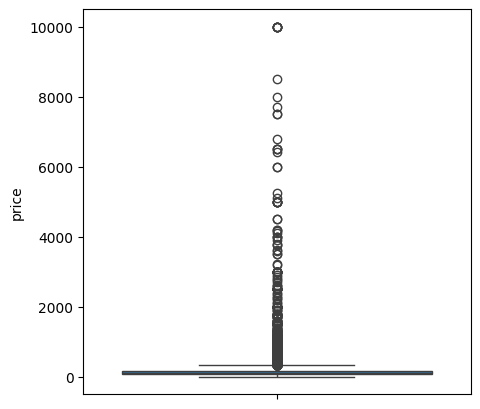

In [50]:
# IQR for Price

price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(price_iqr, 2)}")

fig = plt.subplots(1, 1, figsize = (5, 5))
sns.boxplot(data = data_clean, y = "price")
plt.show()

We need clean outliers from Price

In [51]:
# Clean the outliers

data_clean = data_clean[data_clean["price"] > 0]

In [52]:
count_0 = data_clean[data_clean["price"] == 0].shape[0]
count_1 = data_clean[data_clean["price"] == 1].shape[0]

print("Count of 0: ", count_0)
print("Count of 1: ", count_1)

Count of 0:  0
Count of 1:  0


### Adjust minimum_nights

In [54]:
nights_stats = data_clean["minimum_nights"].describe()
nights_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

The upper and lower limits for finding outliers are 11.0 and -5.0, with an interquartile range of 4.0


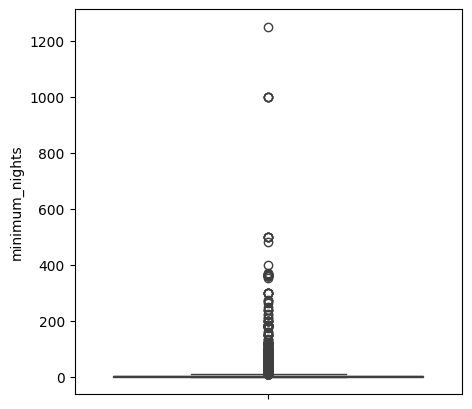

In [56]:
# IQR for minimum_nights
nights_iqr = nights_stats["75%"] - nights_stats["25%"]

upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(nights_iqr, 2)}")

fig = plt.subplots(1, 1, figsize = (5, 5))
sns.boxplot(data = data_clean, y = "minimum_nights")
plt.show()

In [57]:
# Clean the outliers

total_data = data_clean[data_clean["minimum_nights"] <= 15]

In [64]:
count_0 = data_clean[data_clean["minimum_nights"] == 0].shape[0]
count_1 = data_clean[data_clean["minimum_nights"] == 1].shape[0]
count_2 = data_clean[data_clean["minimum_nights"] == 2].shape[0]
count_3 = data_clean[data_clean["minimum_nights"] == 3].shape[0]
count_4 = data_clean[data_clean["minimum_nights"] == 4].shape[0]


print("Count of 0: ", count_0)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)
print("Count of 3: ", count_3)
print("Count of 4: ", count_4)

Count of 0:  0
Count of 1:  12717
Count of 2:  11693
Count of 3:  7998
Count of 4:  3302


### Adjust number_of_reviews

In [59]:
# Stats for number_of_reviews

review_stats = total_data["number_of_reviews"].describe()
review_stats

count    43265.000000
mean        25.211950
std         46.292011
min          0.000000
25%          1.000000
50%          6.000000
75%         27.000000
max        629.000000
Name: number_of_reviews, dtype: float64

The upper and lower limits for finding outliers are 66.0 and -38.0, with an interquartile range of 26.0


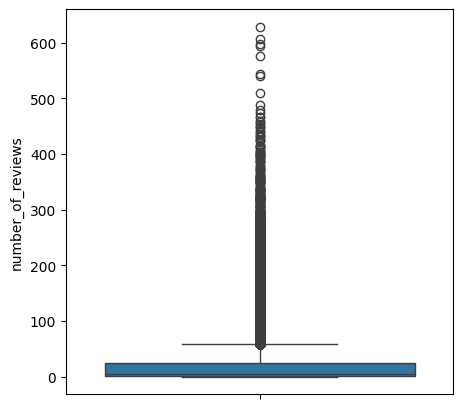

In [60]:
# IQR for number_of_reviews

review_iqr = review_stats["75%"] - review_stats["25%"]

upper_limit = review_stats["75%"] + 1.5 * review_iqr
lower_limit = review_stats["25%"] - 1.5 * review_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(review_iqr, 2)}")

fig = plt.subplots(1, 1, figsize = (5, 5))
sns.boxplot(data = data_clean, y = "number_of_reviews")
plt.show()

### Adjust calculated_host_listings_count

In [69]:
# Stats for calculated_host_listings_count

hostlist_stats = data_clean["calculated_host_listings_count"].describe()
hostlist_stats

count    48884.000000
mean         7.144628
std         32.956185
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

The upper and lower limits for finding outliers are 3.5 and -0.5, with an interquartile range of 1.0


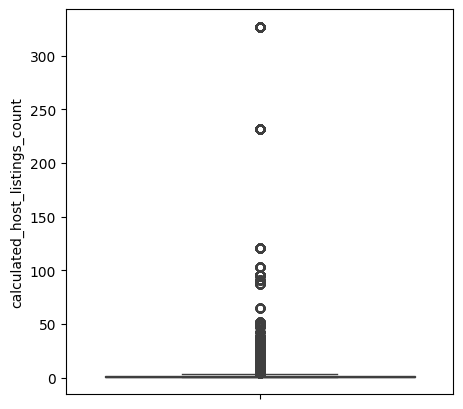

In [70]:
# IQR for calculated_host_listings_count

hostlist_iqr = hostlist_stats["75%"] - hostlist_stats["25%"]

upper_limit = hostlist_stats["75%"] + 1.5 * hostlist_iqr
lower_limit = hostlist_stats["25%"] - 1.5 * hostlist_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(hostlist_iqr, 2)}")

fig = plt.subplots(1, 1, figsize = (5, 5))
sns.boxplot(data = data_clean, y = "calculated_host_listings_count")
plt.show()

In [71]:
count_04 = sum(1 for x in data_clean["calculated_host_listings_count"] if x in range(0, 5))
count_1 = data_clean[data_clean["calculated_host_listings_count"] == 1].shape[0]
count_2 = data_clean[data_clean["calculated_host_listings_count"] == 2].shape[0]

print("Count of 0: ", count_04)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)

Count of 0:  43249
Count of 1:  32301
Count of 2:  6657


In [73]:
# Clean the outliers

data_clean = data_clean[data_clean["calculated_host_listings_count"] > 4]

### Missing value analysis

In [75]:
# Count NaN
data_clean.isnull().sum().sort_values(ascending = False)

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [76]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5635 entries, 0 to 48893
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         5635 non-null   int64  
 1   neighbourhood_group             5635 non-null   int64  
 2   neighbourhood                   5635 non-null   int64  
 3   latitude                        5635 non-null   float64
 4   longitude                       5635 non-null   float64
 5   room_type                       5635 non-null   int64  
 6   price                           5635 non-null   int64  
 7   minimum_nights                  5635 non-null   int64  
 8   number_of_reviews               5635 non-null   int64  
 9   calculated_host_listings_count  5635 non-null   int64  
 10  availability_365                5635 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 528.3 KB


### Feature scaling

In [78]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(data_clean[num_variables])
df_scal = pd.DataFrame(scal_features, index = data_clean.index, columns = num_variables)
df_scal["price"] = data_clean["price"]
df_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,0.016575,0.000000,0.003106,1.000000,0.0,0.0,149
21,0.239411,0.001002,0.003106,0.950685,0.0,0.0,130
22,0.071823,0.000000,0.003106,0.997260,0.0,0.0,80
23,0.130755,0.001002,0.003106,0.832877,0.0,0.0,110
92,0.029466,0.006012,0.003106,0.506849,0.0,0.0,98


## Step 6: Feature selection

In [79]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("price", axis = 1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,number_of_reviews,calculated_host_listings_count,availability_365,room_type
0,0.009208,0.049689,0.761644,0.5
1,0.001842,0.012422,0.909589,0.0
2,0.000000,0.360248,0.506849,0.5
3,0.011050,0.062112,0.704110,0.5
4,0.108656,0.000000,0.923288,0.5


### Save the clean and raw data

In [80]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)